In [5]:
import pandas as pd

# 读取 Excel 文件
excel_file = pd.ExcelFile('焦虑因素研究数据.xlsx')

# 获取所有表名
sheet_name = excel_file.sheet_names
sheet_name

['原始数据',
 '数据概要',
 '焦虑类别分布',
 '相关性分析',
 '工作压力分布',
 '经济压力分布',
 '社会支持分布',
 '健康担忧分布',
 '人际关系问题分布',
 '未来不确定性分布',
 '自我期望分布',
 '信息过载分布']

In [6]:
# 获取指定工作表中的数据
df = excel_file.parse('原始数据')

# 查看数据的基本信息
print('数据基本信息：')
df.info()

# 查看数据集行数和列数
rows, columns = df.shape

if rows < 100 and columns < 20:
    # 短表数据（行数少于100且列数少于20）查看全量数据信息
    print('数据全部内容信息：')
    print(df.to_csv(sep='\t', na_rep='nan'))
else:
    # 长表数据查看数据前几行信息
    print('数据前几行内容信息：')
    print(df.head().to_csv(sep='\t', na_rep='nan'))

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1000 non-null   object 
 1   年龄        1000 non-null   int64  
 2   性别        1000 non-null   object 
 3   教育程度      1000 non-null   object 
 4   收入水平      1000 non-null   object 
 5   婚姻状况      1000 non-null   object 
 6   居住状况      1000 non-null   object 
 7   城市类型      1000 non-null   object 
 8   工作压力      1000 non-null   int64  
 9   经济压力      1000 non-null   int64  
 10  社会支持      1000 non-null   int64  
 11  健康担忧      1000 non-null   int64  
 12  人际关系问题    1000 non-null   int64  
 13  未来不确定性    1000 non-null   int64  
 14  自我期望      1000 non-null   int64  
 15  信息过载      1000 non-null   int64  
 16  焦虑水平      1000 non-null   float64
 17  焦虑类别      1000 non-null   object 
 18  焦虑症状      998 non-null    object 
 19  应对方式      1000 non-null   object 
 20  支持来源      1000 non-null

In [7]:
from sklearn.preprocessing import LabelEncoder

# 1. 填充缺失值
df['焦虑症状'] = df['焦虑症状'].fillna('无')

# 2. 对 object 类型数据进行编码
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# 3. 检查并处理重复值
df = df.drop_duplicates()

# 保存预处理后的数据
df.to_excel('预处理后数据.xlsx', index=False)

In [11]:
 #导入所需库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

# 设置中文字体，确保中文正常显示
plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC"]  # 针对不同系统的字体设置
plt.rcParams["axes.unicode_minus"] = False  # 确保负号正确显示


In [9]:
# 一、数据读取与预处理
data = pd.read_excel('焦虑因素研究数据_预处理后.xlsx')
print("数据形状：", data.shape)
print("缺失值统计：\n", data.isnull().sum())

# 1. 处理分类变量（示例：性别、教育程度）
le = LabelEncoder()
data['性别'] = le.fit_transform(data['性别'])  # 假设原始数据为男/女/其他，编码为0/1/2
data['教育程度'] = le.fit_transform(data['教育程度'])  # 按学历层次编码为0 - 4

# 2. 划分连续变量和分类变量
continuous_vars = ['年龄', '工作压力', '经济压力', '社会支持', '焦虑水平']
categorical_vars = ['性别', '教育程度', '婚姻状况', '城市类型']

数据形状： (1000, 22)
缺失值统计：
 ID          0
年龄          0
性别          0
教育程度        0
收入水平        0
婚姻状况        0
居住状况        0
城市类型        0
工作压力        0
经济压力        0
社会支持        0
健康担忧        0
人际关系问题      0
未来不确定性      0
自我期望        0
信息过载        0
焦虑水平        0
焦虑类别        0
焦虑症状        0
应对方式        0
支持来源        0
是否寻求专业帮助    0
dtype: int64


In [10]:
# 二、描述性统计分析
def descriptive_analysis(df, continuous_vars, categorical_vars):
    # 连续变量统计
    cont_stats = df[continuous_vars].describe()
    print("\n连续变量描述统计：\n", cont_stats)
    
    # 分类变量统计
    cat_stats = df[categorical_vars].apply(lambda x: x.value_counts(normalize=True))
    print("\n分类变量分布（频率）：\n", cat_stats)
    
    # 性别与焦虑水平差异检验
    male = df[df['性别'] == 0]['焦虑水平']
    female = df[df['性别'] == 1]['焦虑水平']
    t_stat, p_val = ttest_ind(male, female)
    print(f"\n性别与焦虑水平t检验：t={t_stat:.2f}, p={p_val:.4f}")

descriptive_analysis(data, continuous_vars, categorical_vars)


连续变量描述统计：
                 年龄         工作压力         经济压力         社会支持         焦虑水平
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean     43.809000     3.037000     3.037000     2.944000     0.502130
std      15.084763     1.416912     1.402711     1.398864     0.270438
min      18.000000     1.000000     1.000000     1.000000     0.000000
25%      31.000000     2.000000     2.000000     2.000000     0.310000
50%      44.000000     3.000000     3.000000     3.000000     0.510000
75%      57.000000     4.000000     4.000000     4.000000     0.700000
max      69.000000     5.000000     5.000000     5.000000     1.000000

分类变量分布（频率）：
       性别   教育程度   婚姻状况   城市类型
0  0.350  0.229  0.259  0.252
1  0.325  0.187  0.231  0.240
2  0.325  0.199  0.272  0.263
3    NaN  0.196  0.238  0.245
4    NaN  0.189    NaN    NaN

性别与焦虑水平t检验：t=-0.17, p=0.8626


findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

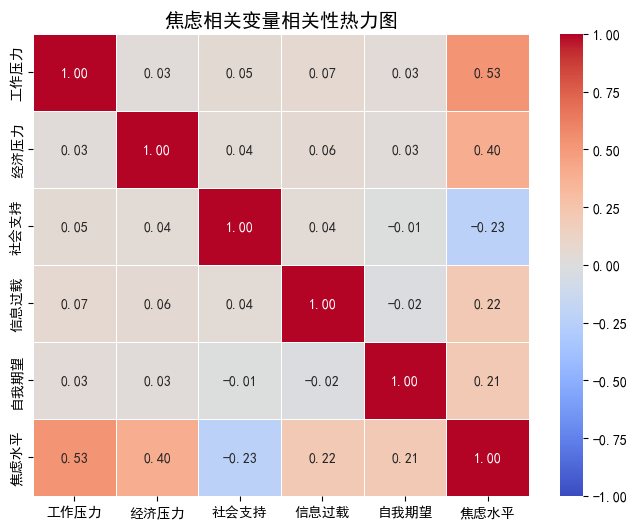

In [12]:
# 三、相关性分析
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

# 读取数据
data = pd.read_excel('焦虑因素研究数据_预处理后.xlsx')

# 选择相关变量（连续变量+有序分类变量）
corr_vars = ['工作压力', '经济压力', '社会支持', '信息过载', '自我期望', '焦虑水平']
df_corr = data[corr_vars].dropna()

# 计算相关系数矩阵（报告中使用Pearson和Spearman，此处统一用Pearson示例）
corr_matrix = df_corr.corr(method='pearson')

# 绘制热力图
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,          # 显示系数值
    cmap='coolwarm',     # 颜色映射
    vmin=-1, vmax=1,     # 取值范围
    linewidths=0.5,
    fmt=".2f"           # 保留两位小数
)
plt.title('焦虑相关变量相关性热力图', fontsize=14)
plt.show()

In [22]:
# 四、回归分析
# 1. 多元线性回归（焦虑水平预测）
X_lr = data[['工作压力', '经济压力', '社会支持', '教育程度']]  # 筛选显著相关变量
y_lr = data['焦虑水平']
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train_lr)
y_pred_lr = model_lr.predict(X_test_lr)
print(f"\n线性回归R²：{r2_score(y_test_lr, y_pred_lr):.2f}")
print("回归系数：", dict(zip(X_lr.columns, model_lr.coef_)))

# 2. 逻辑回归（是否寻求专业帮助预测）
data['是否寻求专业帮助'] = data['是否寻求专业帮助'].astype(int)  # 确保为0/1
X_lg = data[['工作压力', '婚姻状况', '社会支持']]
y_lg = data['是否寻求专业帮助']
X_train_lg, X_test_lg, y_train_lg, y_test_lg = train_test_split(X_lg, y_lg, test_size=0.2, random_state=42)

model_lg = LogisticRegression()
model_lg.fit(X_train_lg, y_train_lg)
y_prob_lg = model_lg.predict_proba(X_test_lg)[:, 1]
print(f"逻辑回归AUC：{roc_auc_score(y_test_lg, y_prob_lg):.2f}")


线性回归R²：0.48
回归系数： {'工作压力': 0.09917352590694421, '经济压力': 0.07673259404814953, '社会支持': -0.05432350669761443, '教育程度': -0.010386981811387471}
逻辑回归AUC：0.46


findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

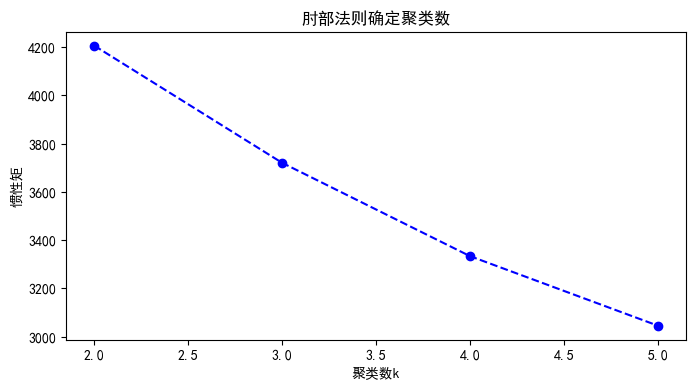


聚类中心特征：
        工作压力      经济压力      社会支持      信息过载      自我期望
0  2.271468  2.670360  2.520776  1.772853  3.252078
1  3.082569  3.183486  3.207951  3.660550  1.666667
2  3.875000  3.307692  3.157051  3.637821  4.224359


In [23]:
# 五、聚类分析（K - 均值聚类）
# 选择压力相关变量
cluster_vars = data[['工作压力', '经济压力', '社会支持', '信息过载', '自我期望']]
# 标准化数据
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_vars)

# 肘部法则确定聚类数
inertia = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 6), inertia, marker='o', linestyle='--', color='b')
plt.xlabel('聚类数k')
plt.ylabel('惯性矩')
plt.title('肘部法则确定聚类数')
plt.show()

# 拟合最优聚类（假设k=3）
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# 查看聚类中心
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=cluster_vars.columns)
print("\n聚类中心特征：\n", cluster_centers)

findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

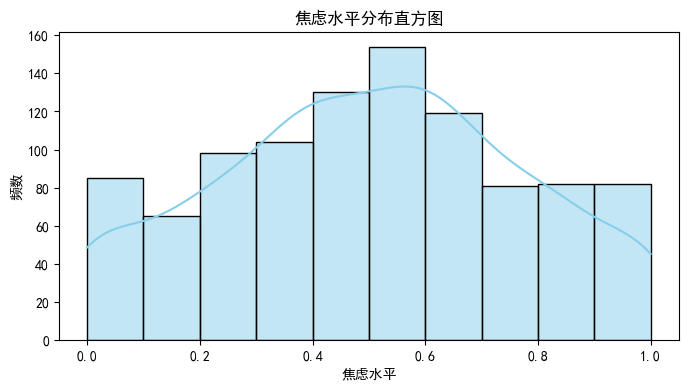

In [24]:
# 六、绘制关键图表
# 1. 焦虑水平直方图
plt.figure(figsize=(8, 4))
sns.histplot(data['焦虑水平'], bins=10, kde=True, color='skyblue')
plt.title('焦虑水平分布直方图')
plt.xlabel('焦虑水平')
plt.ylabel('频数')
plt.show()

findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

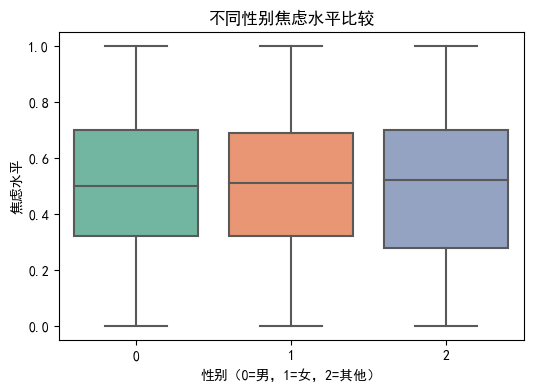

In [25]:
# 2. 不同性别焦虑水平箱线图
plt.figure(figsize=(6, 4))
sns.boxplot(x='性别', y='焦虑水平', data=data, palette='Set2')
plt.title('不同性别焦虑水平比较')
plt.xlabel('性别（0=男，1=女，2=其他）')
plt.ylabel('焦虑水平')
plt.show()


findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

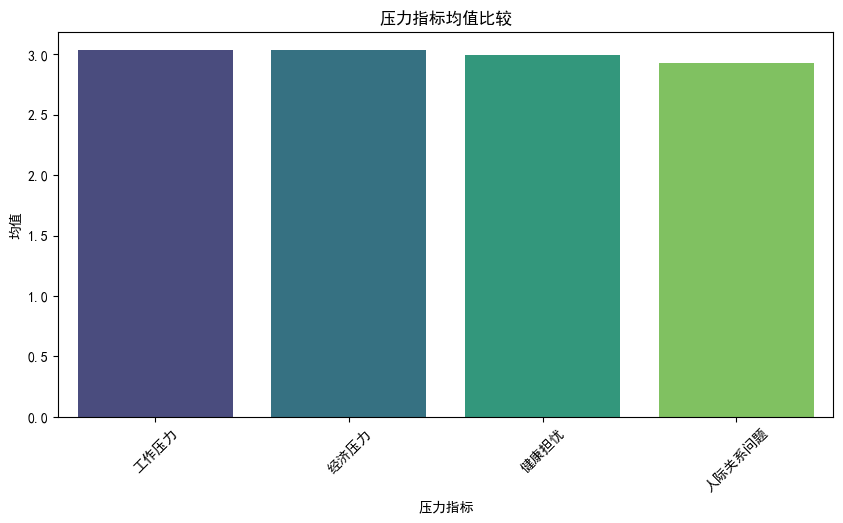

In [26]:
# 3. 压力指标均值柱状图
pressure_vars = ['工作压力', '经济压力', '健康担忧', '人际关系问题']
pressure_mean = data[pressure_vars].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=pressure_mean.index, y=pressure_mean.values, palette='viridis')
plt.title('压力指标均值比较')
plt.xlabel('压力指标')
plt.ylabel('均值')
plt.xticks(rotation=45)
plt.show()

findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

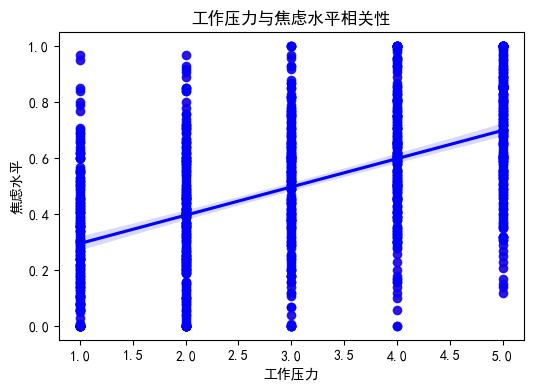

In [27]:
# 4. 工作压力与焦虑水平散点图
plt.figure(figsize=(6, 4))
sns.scatterplot(x='工作压力', y='焦虑水平', data=data, alpha=0.6, color='red')
sns.regplot(x='工作压力', y='焦虑水平', data=data, color='blue')
plt.title('工作压力与焦虑水平相关性')
plt.xlabel('工作压力')
plt.ylabel('焦虑水平')
plt.show()

findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

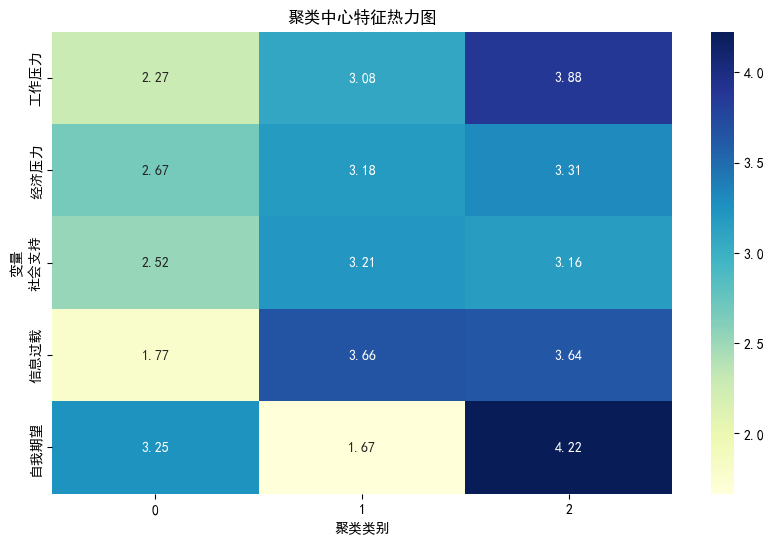

In [28]:
# 5. 聚类结果热力图（简化示例）
cluster_vars_centers = cluster_centers.T
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_vars_centers, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('聚类中心特征热力图')
plt.xlabel('聚类类别')
plt.ylabel('变量')
plt.show()


findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: Font family 'WenQuanYi Micro Hei' not found.
findfont: Font family 'Heiti TC' not found.
findfont: 

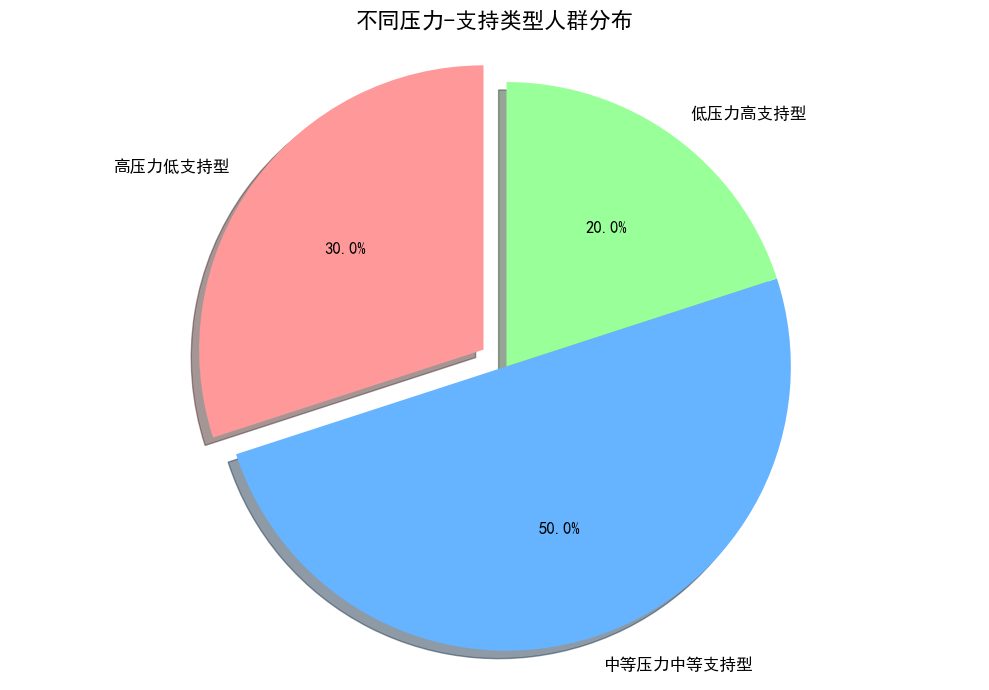

In [14]:
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams["font.family"] = ["SimHei", "WenQuanYi Micro Hei", "Heiti TC"]

# 数据
categories = ['高压力低支持型', '中等压力中等支持型', '低压力高支持型']
percentages = [30, 50, 20]
colors = ['#ff9999', '#66b3ff', '#99ff99']  # 自定义颜色，分别对应高、中、低压力群体
explode = (0.1, 0, 0)  # 突出显示高压力低支持型群体

# 创建画布
plt.figure(figsize=(10, 7))

# 绘制饼图
plt.pie(
    percentages,
    explode=explode,
    labels=categories,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=90,
    textprops={'fontsize': 12}
)

# 添加标题
plt.title('不同压力-支持类型人群分布', fontsize=16)

# 确保饼图是圆形
plt.axis('equal')

# 显示图形
plt.tight_layout()
plt.show()    